In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from cleanse_pipe import cleanse_data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [54]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data, passengers = cleanse_data(df)

In [56]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Sex_Male,Farebin,Agebin
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,0,1,0,0,1,2,2
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,1,0,0,5,4
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0,0,0,2,2
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,5,4
4,0,3,35.0,0,0,8.0500,0,0,1,1,0,0,1,0,0,1,2,4


In [57]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Sex_Male,Farebin,Agebin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.602694,0.056117,0.204265,0.592593,0.140292,0.006734,0.647587,3.204265,2.940516
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.489615,0.230276,0.403390,0.491628,0.347485,0.081830,0.477990,1.208037,1.362354
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000


In [58]:
# normalize continuous variables with z-score

for col in ['Age','Fare'] :
    col_mean = np.mean(data[col])
    col_sd = np.std(data[col])
    data[col] = (data[col] - col_mean) / col_sd

In [59]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Sex_Male,Farebin,Agebin
count,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,4.447683e-15,0.523008,0.381594,6.690620e-16,0.188552,0.086420,0.725028,0.602694,0.056117,0.204265,0.592593,0.140292,0.006734,0.647587,3.204265,2.940516
std,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00,0.391372,0.281141,0.446751,0.489615,0.230276,0.403390,0.491628,0.347485,0.081830,0.477990,1.208037,1.362354
min,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,3.000000,4.374348e-15,0.000000,0.000000,-3.573909e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000
max,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'Survived'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare'),
  Text(7, 0, 'Embarked_C'),
  Text(8, 0, 'Embarked_Q'),
  Text(9, 0, 'Embarked_S'),
  Text(10, 0, 'Alone'),
  Text(11, 0, 'Title_Master'),
  Text(12, 0, 'Title_Miss'),
  Text(13, 0, 'Title_Mr'),
  Text(14, 0, 'Title_Mrs'),
  Text(15, 0, 'Title_Ms'),
  Text(16, 0, 'Sex_Male'),
  Text(17, 0, 'Farebin'),
  Text(18, 0, 'Agebin')])

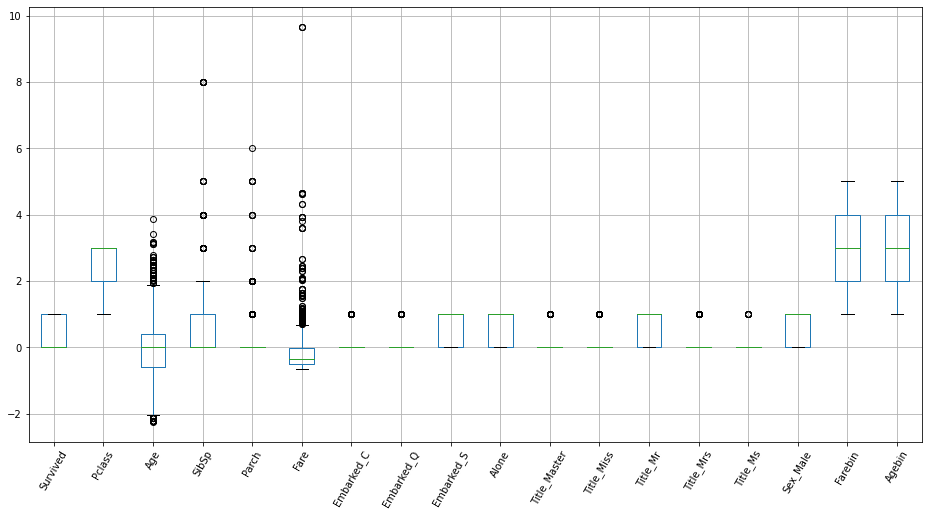

In [60]:
plt.figure(figsize = (16,8))
data.boxplot()
plt.xticks(rotation = 60)

[Text(0.5, 0, 'Survived'),
 Text(1.5, 0, 'Pclass'),
 Text(2.5, 0, 'Age'),
 Text(3.5, 0, 'SibSp'),
 Text(4.5, 0, 'Parch'),
 Text(5.5, 0, 'Fare'),
 Text(6.5, 0, 'Embarked_C'),
 Text(7.5, 0, 'Embarked_Q'),
 Text(8.5, 0, 'Embarked_S'),
 Text(9.5, 0, 'Alone'),
 Text(10.5, 0, 'Title_Master'),
 Text(11.5, 0, 'Title_Miss'),
 Text(12.5, 0, 'Title_Mr'),
 Text(13.5, 0, 'Title_Mrs'),
 Text(14.5, 0, 'Title_Ms'),
 Text(15.5, 0, 'Sex_Male'),
 Text(16.5, 0, 'Farebin'),
 Text(17.5, 0, 'Agebin')]

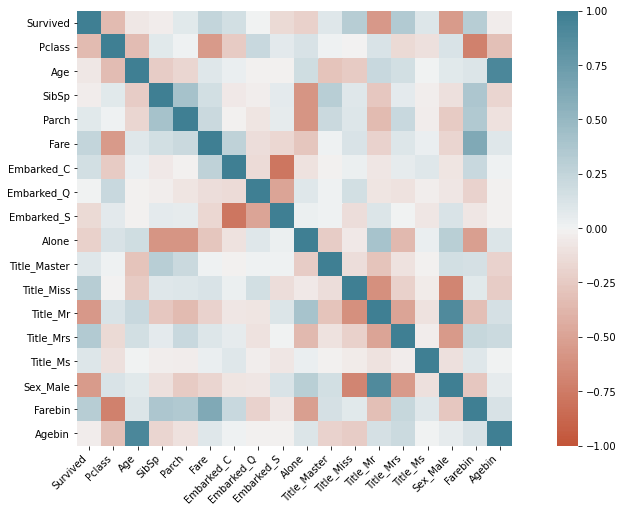

In [61]:
# run a correlation matrix
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

corr = data.corr()
plt.figure(figsize=(16,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


In [62]:
# delete unncessary variables due to multicolinearitiy

del[data['Embarked_C'], data['Age'], data['Fare']]

In [63]:
# split x and y

target = data['Survived']
del[data['Survived']]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Pclass'),
  Text(2, 0, 'SibSp'),
  Text(3, 0, 'Parch'),
  Text(4, 0, 'Embarked_Q'),
  Text(5, 0, 'Embarked_S'),
  Text(6, 0, 'Alone'),
  Text(7, 0, 'Title_Master'),
  Text(8, 0, 'Title_Miss'),
  Text(9, 0, 'Title_Mr'),
  Text(10, 0, 'Title_Mrs'),
  Text(11, 0, 'Title_Ms'),
  Text(12, 0, 'Sex_Male'),
  Text(13, 0, 'Farebin'),
  Text(14, 0, 'Agebin')])

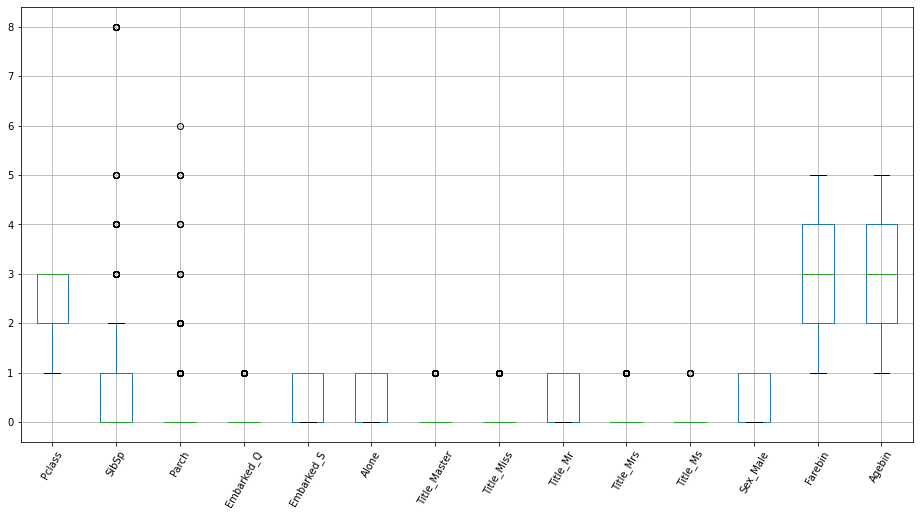

In [64]:
plt.figure(figsize = (16,8))
data.boxplot()
plt.xticks(rotation = 60)

In [65]:
# run train/test split

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size = 0.2, random_state = 349857675)

In [66]:
#double check target means on train and test are about the same

print(y_train.mean(), y_test.mean())

0.3848314606741573 0.37988826815642457


In [67]:
# run decision tree model

tree_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 4, min_samples_split=6, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight= None, ccp_alpha=0.0)

tree_model_fit = tree_model.fit(x_train, y_train)

tree_model_predict = tree_model_fit.predict(x_test)

print(classification_report(y_test, tree_model_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       111
           1       0.75      0.78      0.76        68

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [68]:
# grid search 

search_params = {
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12],
    "min_samples_leaf" : [2,3,4,5,6,10,12,15,20]
}

tree_search = GridSearchCV(tree_model, param_grid = search_params, n_jobs = -1)

tree_search_fit = tree_search.fit(x_train, y_train)

print(tree_search_fit.best_params_)


search_predict = tree_search_fit.predict(x_test)

print(classification_report(y_test, search_predict))



{'max_depth': 3, 'min_samples_leaf': 20}
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       111
           1       0.80      0.75      0.77        68

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



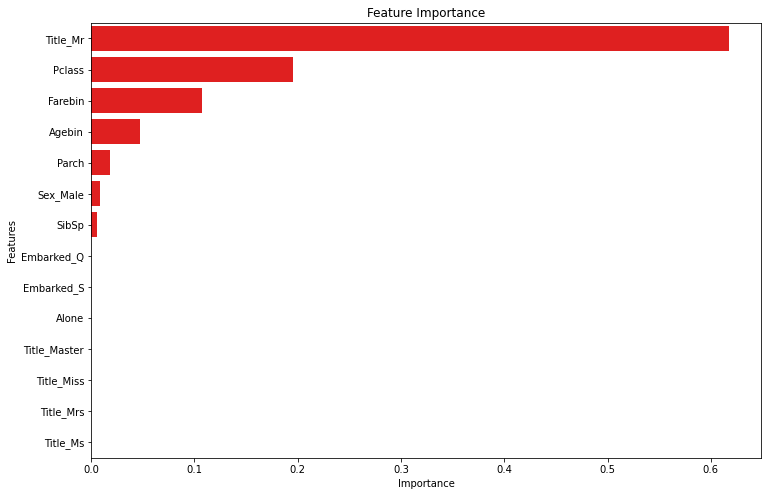

In [69]:
feature_importance = pd.DataFrame({"Features": x_train.columns, "Importance":tree_model_fit.feature_importances_})

feature_importance = feature_importance.sort_values('Importance', ascending= False)

plt.figure(figsize = (12,8))
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance, color = 'red')
plt.title('Feature Importance')
plt.show()

In [70]:
# prep for submission

test = pd.read_csv('test.csv')
test_data, passengers1 = cleanse_data(test)

del[test_data['Age'], test_data['Fare'], test_data['Embarked_C']]


preds = tree_search_fit.predict(test_data)

ready_preds = pd.DataFrame({'PassengerId' : passengers1, "Survived" : preds})

ready_preds.to_csv('titanic_preds.csv', index = False)

In [71]:
ready_preds.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


I'm getting 76.7% Accuracy with this very simple model. I learned how the variables are interacting and in model_notebook I attempt a few more complicated models to attempt to improve accuracy